<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/regression_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [12]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [13]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
insurance_one_hot =  pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [15]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [16]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [17]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [20]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [30]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(1)
])
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr=0.001),
                        metrics=['mae'])
history = insurance_model.fit(x_train, y_train, batch_size=32,  epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13198.9180 - mae: 13198.9180
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12462.3027 - mae: 12462.3027
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 10410.9590 - mae: 10410.9590
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7844.8486 - mae: 7844.8486
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.5967 - mae: 7429.5967
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7382.6699 - mae: 7382.6699
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7332.0708 - mae: 7332.0708
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7292.1245 - mae: 7292.1245
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7250.3975 - mae: 7250.3975
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7210.2705 - mae: 721

In [28]:
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3505.1694 - mae: 3505.1694


[3505.16943359375, 3505.16943359375]

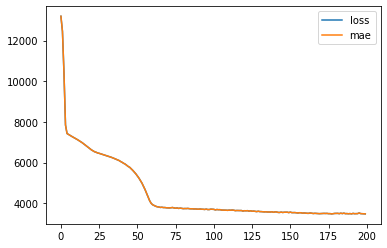

In [38]:
pd.DataFrame(history.history).plot()

#Feature Scaling 
**in particular Normalization**

In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [47]:
x = data.drop('charges', axis=1)
y = data['charges']

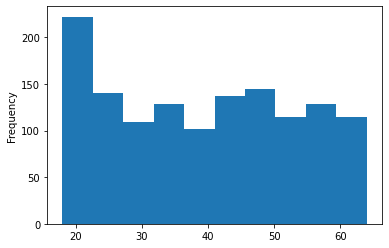

In [48]:
x['age'].plot(kind='hist')

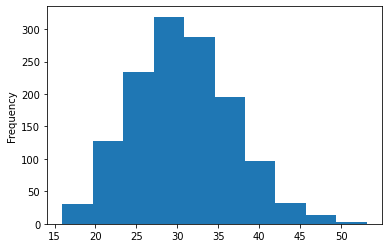

In [49]:
x['bmi'].plot(kind='hist') # we can see that, scale of both the plots are different. we need to fix this stuff.

In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# create a column transformer
ct = make_column_transformer((MinMaxScaler(), ['age','bmi', 'children']),
                             (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker','region']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



x_train_normal = ct.fit_transform(x_train)
x_test_normal = ct.transform(x_test)
 

In [57]:
x_train_normal # it has got converted into numpy array

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                         tf.keras.layers.Dense(100),
                         tf.keras.layers.Dense(100),
                         tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])
history = model.fit(x_train_normal, y_train, epochs=125)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/125
34/34 [==============================] - 0s 2ms/step - loss: 12637.2021 - mae: 12637.2021
Epoch 2/125
34/34 [==============================] - 0s 1ms/step - loss: 8120.7441 - mae: 8120.7441
Epoch 3/125
34/34 [==============================] - 0s 1ms/step - loss: 7099.0166 - mae: 7099.0166
Epoch 4/125
34/34 [==============================] - 0s 1ms/step - loss: 5560.9072 - mae: 5560.9072
Epoch 5/125
34/34 [==============================] - 0s 1ms/step - loss: 3890.3486 - mae: 3890.3486
Epoch 6/125
34/34 [==============================] - 0s 2ms/step - loss: 3656.1345 - mae: 3656.1345
Epoch 7/125
34/34 [==============================] - 0s 2ms/step - loss: 3625.7568 - mae: 3625.7568
Epoch 8/125
34/34 [==============================] - 0s 1ms/step - loss: 3625.8984 - mae: 3625.8984
Epoch 9/125
34/34 [==============================] - 0s 2ms/step - loss: 3570.4048 - mae: 3570.4048
Epoch 10/125
34/34 [==============================] - 0s 2ms/step - loss: 3551.8513 - mae: 3551.85

In [61]:
model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3282.0632 - mae: 3282.0632


[3282.063232421875, 3282.063232421875]